In [1]:
#Getting the data ready
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
data = pd.read_csv('default of credit card clients.csv')
# print(data.head(3))
df = data.iloc[1:,1:24]
label=data.iloc[1:,-1]
#Random Forest
#Fristly, the dataset is divided into data_train and data_testto simulate the training data and the new arrivals
X_train, X_test, Y_train, Y_test = train_test_split(df,label,test_size=0.4)

In [3]:
#Random Forest
#parameters
# n_estimators: the number of decision tree models in the random forest model
# max_depth: the maximum depth of the decision tree model
# max_features: the maximum number of features to be selected when building the decision tree
# min_samples_leaf: the minimum number of samples of leaf nodes
# min_samples_split: the minimum number of samples allowed to be split by the current node
# criterion: the basis for node splitting
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import time
# Let's first look at the comparison between decision trees and random forests (both with default parameters)
# For train data, it can often be divided into a train_set for training the model and a validation_set for evaluating
#the selection of the model during the training process.
X_trainset, X_valset, Y_trainset, Y_valset = train_test_split(X_train,Y_train,test_size=0.3)
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
clf = clf.fit(X_trainset,Y_trainset)
rfc = rfc.fit(X_trainset,Y_trainset)
score_c = clf.score(X_valset,Y_valset)
score_r = rfc.score(X_valset,Y_valset)
print("Single Tree:{}".format(score_c),"Random Forest:{}".format(score_r))

Single Tree:0.7242592592592593 Random Forest:0.817037037037037


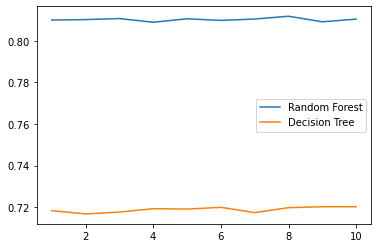

In [4]:
rfc_l = []
clf_l = []
for i in range(10):
 rfc = RandomForestClassifier(n_estimators=25)
 rfc_s = cross_val_score(rfc,X_train,Y_train,cv=10).mean()
 rfc_l.append(rfc_s)
 clf = DecisionTreeClassifier()
 clf_s = cross_val_score(clf,X_train,Y_train,cv=10).mean()
 clf_l.append(clf_s)
plt.plot(range(1,11),rfc_l,label = "Random Forest")
plt.plot(range(1,11),clf_l,label = "Decision Tree")
plt.legend()
plt.show()